In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Problem Set 3

### PHYS 441

***

Adam A Miller  
12 October 2022  
version 0.1

Problem sets for Phys 441 are due 1 week after they are assigned at 11:59 pm. 

Every student is responsible for submitting their own *individual* solutions. Solutions must be either an executable jupyter notebook or Adobe PDF file submitted via Canvas. You must **show all your work**. Submissions that only include answers will have points deducted.

If the problem set calls for an integral, please calculate the integral by hand (in general any problem with integrals will not require the use of mathematica or similar tools).

If you wish to "write mathematics" in a Jupyter notebook, this can be done using LaTeX formatting.

LaTeX is great at typesetting mathematics. Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with $\text{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2 < \infty$, and let

$$S_n = \frac{X_1 + X_2 + \cdots + X_n}{n}
      = \frac{1}{n}\sum_{i}^{n} X_i$$
      
denote their mean. Then as $n$ approaches infinity, the random variables $\sqrt{n}(S_n - \mu)$ converge in distribution to a normal $\mathcal{N}(0, \sigma^2)$.

You can find a [summary of all the LaTeX math symbols](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols) from Overleaf. 

## Problem 1) 6 points

You have an astro professor that loves to eat [Marmite](https://en.wikipedia.org/wiki/Marmite). So much so that the professor eats on average 2.7 Tbsp of Marmite every day.

You have a physics professor that loves [Vegemite](https://en.wikipedia.org/wiki/Vegemite) even more. This professor eats on average 4.5 Tbsp of Vegemite every day.

Assume that the daily consumption of yeast-extract based foods (the two "mites" above) can only be done for integer values of Tbsp in any given day. This means the amount of Marmite or Vegemite eaten in a day follows a Possion distribution.

**Problem 1a**

What is the most likely amount of Marmite that the astro professor eats in 1 day?

$\text{P}_{Marmite}(X=k)=\frac{\lambda^{k}e^{-\lambda}}{k!}$, with $E[X]=\lambda=2.7$

Hence, $\text{P}_{Marmite}(X=k)=\frac{2.7^{k}e^{-2.7}}{k!}$


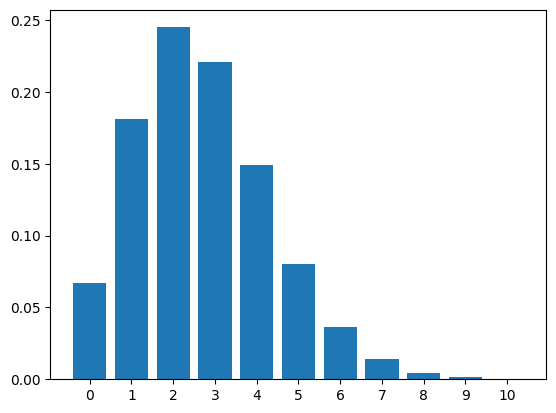

In [3]:
def pmf_marmite(k, const_lambda=2.7):
    nominator = (const_lambda**k) * (math.exp(-1*const_lambda))
    denominator = math.factorial(k)

    return nominator/denominator 

numbers = range(11)
prob = list(map(pmf_marmite, numbers))
labels = [str(i) for i in numbers]

fig, ax = plt.subplots() 
plt.bar(x=labels, height=prob)
plt.show()    

Hence, the most likely amount of Marmite that the astro professor eats in 1 day is 2 tablespoons. 

**Problem 1b**

Your physics professor has an "off" day and eats only 4 Tbsp of Vegemite. What is the probability that the astro professor eats more Marmite than the physics professor ate Vegemite on this day?

In order for the astro prof to eat more marmite than the physics prof ate vegemite, the prof must eat more than 4 tablespoons (greater or equal than 5 tablespoons) of marmite a day, so 

\begin{align}
\text{P}_{Marmite}(X \geq 5)    &= 1 - \text{P}_{Marmite}(X \leq 4) \\ 
                                &= 1 - \sum_{k=0}^{4} \frac{2.7^{k}e^{-2.7}}{k!} \\         
\end{align}

<!---
&= \sum_{k=5}^{\infty} \frac{2.7^{k}e^{-2.7}}{k!} \\ 
&= e^{-2.7} \sum_{k=5}^{\infty} \frac{2.7^{k}}{k!} \\ 
&=  e^{-2.7} (\sum_{k=0}^{\infty} \frac{2.7^{k}}{k!} - \sum_{k=0}^{4} \frac{2.7^{k}}{k!}) \\ 
&= e^{-2.7} (e^{2.7} - )
---> 

In [4]:
numbers = range(5)
prob = map(pmf_marmite, numbers)
print(1 - sum(prob)) 

0.1370921373174332


Hence, the astro prof has a **13.7\%** chance of eating more marmite than the physics prof ate vegemite on his off day. 

## Problem 2) 4 points

32% of all household cats are born with extra long whiskers.

While visiting a friend, you notice that 2 of their 7 cats have extra long whiskers. Asumming that the cats are not related (i.e., the probability of extra long whiskers is independent) What is the probability that only 2 of your friends 7 cats has extra long whiskers? 

This is a binomial distribution $f(k, n, p)$ with $k=2$, $n=7$, and $p=0.32$.

Hence, 

\begin{align}

f(k, n, p)  &= \text{P}(k; n; p) \\
            &= {n \choose k} p^{k}(1-p)^{n-k} \\
            &= {7 \choose 2} 0.32^{2}(1-0.32)^{5} \\ 
            &= \frac{7!}{5! \times 2!} \times 0.32^{2} \times (0.68)^{5} \\ 
\end{align}

In [5]:
p = (math.factorial(7)/(math.factorial(2) * math.factorial(5))) * (0.32)**2 * (0.68)**5 
print(p) 

0.31265387446272014


Hence, the prob that only 2 of the 7 cats have extra long whiskers is approximately 0.312, or 31.2\%

## Problem 3) 20 points

The normal distribution serves as a good approximation of the binomial distribution in the limit that the mean is large. 

**Problem 3a**

One day as you are walking down the street you meet a sloth that says "Hello, I have been training my whole life to throw darts, and as a result I can hit a direct bullseye 25% of the time." (for the purposes of this problem, yes, sloths can talk, they can also play darts, and they definitely do not lie)

You are skeptical, so you ask the sloth to demonstrate these skills by throwing a dart 500 times. 

Assuming the sloth is telling the truth, what is the mean number of bullseyes that will occur after 500 attempts?

The mean of a binomial distribution is $np$ where $n$ is the number of trails and $p$ is the probability of a successful trail. 
Hence, the mean number of bullsyes that will occur after 500 attempts is $500 \times 0.25 = 125$ 


**Problem 3b**

What is the variance in the number of bulleyes after 500 attempts?

The variance of a binomial distribution is $np(1-p) = 500 \times 0.25 \times 0.75 = 93.75$ 

**Problem 3c**

Use a random number generator to determine the number of bullseyes after the wallaby throws the dart 500 times. Record the number of bullseyes. 

Repeat this random number generation for a total of 5000 times, record the number of bullseyes in each experiment (i.e., run the same experiment, 500 dart throws, 5000 times). Plot the distribution (i.e., a histogram) of the number of bullseyes. 

*Hint* – think about the number of bins you include in this plot.

In [6]:
import numpy as np 
print(np.random.binomial(500, 0.25))

134


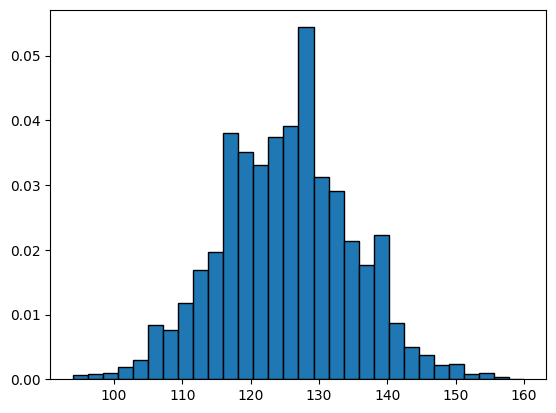

In [7]:
n_bulleyes_5000 = [np.random.binomial(500, 0.25) for _ in range(5000)]

fig, ax = plt.subplots() 
BINS = 30
plt.hist(n_bulleyes_5000, bins=BINS, edgecolor='black', density=True)
plt.show()    

**Problem 3d**

Based on your 5000 experiments what is the sample mean for the number of bullseyes? 

What is the sample variance for the number of bullseyes? 

How do these compare to the expected mean and variance? 



In [8]:
sample_mean = np.mean(n_bulleyes_5000)
sample_var = np.var(n_bulleyes_5000) 

print(f'The sample mean is {sample_mean:.2f} bullseyes.')
print(f'The sample variance is {sample_var:.2f} bullseyes.')
print(f'The sample mean ({sample_mean:.2f}) and variance ({sample_var:.2f}) is very close to the expected mean ({125}) and variance ({93.75})')

The sample mean is 125.12 bullseyes.
The sample variance is 92.95 bullseyes.
The sample mean (125.12) and variance (92.95) is very close to the expected mean (125) and variance (93.75)


**Problem 3e**

Overplot a Gaussian on the histogram with mean and variance set by your answers to **3a** and **3b**. How do the two compare? 

*Hint* - you may want to normalize the histogram. 

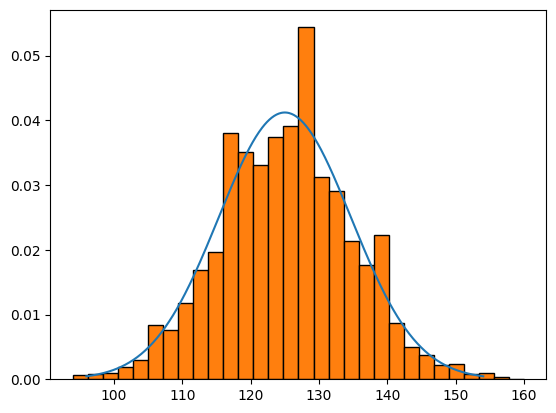

In [9]:
import scipy.stats as stats

def gaussian_dist(mean, var, datapoints=500):
    sigma = math.sqrt(var)
    x_axis = np.linspace(mean - 3*sigma, mean + 3*sigma, datapoints)
    y_axis = stats.norm.pdf(x_axis, mean, sigma)

    return x_axis, y_axis

x, y = gaussian_dist(125, 93.75)

fig, ax = plt.subplots() 
BINS = 30

plt.plot(x, y)
plt.hist(n_bulleyes_5000, bins=BINS, edgecolor='black', density=True)
plt.show() 


The histogram by the sample mean and variance resembles a normal distribution with the expected mean and variance. 



## Problem 4) 30 points

We will numerically demonstrate the central limit theorem in this problem. 

We are going to consider random variables $x$ with p.d.f.s of the form: 

$$f(x) = \begin{cases} cx^p & \text{$\alpha \leq x \leq \beta$} \\
 0 & \text{otherwise} \end{cases}$$
 
where $p$ is an exponent selected from the set {0, 2}, $\alpha$ and $\beta$ define the range for which the p.d.f. is non-zero, and $c$ is a normalization constant to ensure the p.d.f. integrates to 1 from $-\infty$ to $\infty$. 

**Problem 4a**

For $p$ = 2, $\alpha = -3$ and $\beta = 5$, solve for the value of $c$. 

$$f(x) = \begin{cases} cx^2 & \text{$-3 \leq x \leq 5$} \\
 0 & \text{otherwise} \end{cases}$$



$$ \int_{-3}^{5} cx^2 dx = \frac{1}{3} c x^3 \Big|^{5}_{-3} = 1 $$
$$ \frac{1}{3}c (125 - (-27)) = \frac{1}{3}c \cdot 152 = 1 $$ 
$$ c = \frac{3}{152}

**Problem 4b**

Write a program to draw random samples from the pdf defined in **4a**. 

In [10]:
# Method 1
# Reference: https://towardsdatascience.com/random-sampling-with-scipy-and-numpy-part-iii-8daa212ce554

import scipy.stats as stats 

class CustomDistribution(stats.rv_continuous):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def _pdf(self, x):
        if (-3 <= x) and (x <= 5):
            return (3/152) * x**2 
        return 0 

custom_dist = CustomDistribution()

<!--- Method 2: Inverse CDF Sampling --->

\begin{align}
F(x)    &= \int_{-\infty}^{x} f(x) dx \\ 
        &= \int_{-\infty}^{x} \frac{3}{152} x^2 dx \\ 
\end{align}

Since $x$ only has values when $-3 \leq x \leq 5$, the above equation becomes 

\begin{align}
F(x)    &= \int_{-3}^{x} \frac{3}{152} x^2 dx \\ 
        &= \frac{3}{152} \cdot \frac{1}{3} (x^{3} - (-27)) \\ 
        &= \frac{3}{152} \cdot \frac{1}{3} (x^{3} +27) \\ 
        &= \frac{x^{3} +27}{152}
\end{align}

The inverse function $F^{-1}(x) = \sqrt[3]{152x-27}$

In [11]:
def sample_inverse_CDF(size):
    samples_0_to_1 = stats.uniform.rvs(size=size) 
    # print(samples_0_to_1)
    return np.cbrt((152*samples_0_to_1-27))


**Problem 4c**

Draw 100 random samples from the p.d.f. and plot a histogram of the results. Does your plot make sense?

/Users/hyes92121/miniconda3/envs/ds421/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1950: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


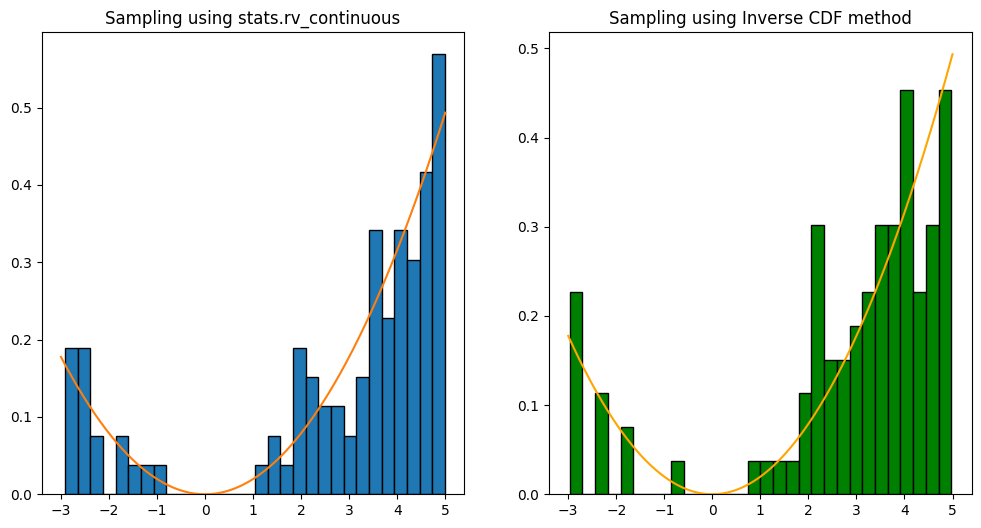

The plot makes sense. The histogram plotted by datapoints drawn from our custom distribution fits the original pdf well


In [12]:
# datapoints drawn from the our custom pdf 
n_sample = 100
n_samples_100 = custom_dist.rvs(size=n_sample)

# datapoints drawn using the inverse CDF method 
n_samples_100_icdf = sample_inverse_CDF(n_sample)

# data points for the actual pdf 
x_axis = np.linspace(-3, 5, 1000)
y_axis = list(map(custom_dist._pdf,x_axis))

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
BINS = 30

# plot datapoints from custom pdf with actual pdf 
ax[0].hist(n_samples_100, bins=BINS, edgecolor='black', density=True)
ax[0].plot(x_axis, y_axis)
ax[0].set_title('Sampling using stats.rv_continuous')

# plot datapoints from inverse cdf with actual pdf 
ax[1].hist(n_samples_100_icdf, bins=BINS, color='green', edgecolor='black', density=True)
ax[1].plot(x_axis, y_axis, color='orange')
ax[1].set_title('Sampling using Inverse CDF method')


plt.show()

print('The plot makes sense. The histogram plotted by datapoints drawn from our custom distribution fits the original pdf well') 

**Problem 4d**

What is the sample mean for the 100 samples drawn from the p.d.f.? 

How does this compare to the true mean?

In [13]:
sample_mean = np.mean(n_samples_100_icdf)
print(sample_mean) 

2.833682928767753


The true mean of the distribution is 

\begin{align}
\mu     &= \int_{-\infty}^{\infty} x f(x) dx \\
        &= \int_{-3}^{5} x\frac{3}{152} x^2 dx \\
        &= \frac{3}{152} \int_{-3}^{5} x^3 dx \\ 
        &= \frac{3}{152} \times \frac{1}{4} \times (5^4-(-3)^4) \\ 
        &= \frac{3}{152} \times \frac{544}{4} \approx 2.68 
\end{align} 

The sample mean is comparable to the true mean. 

**Problem 4e**

Demonstrate the central limit theorem. 

Draw 100 random samples from the p.d.f. 100 times. Record the sample mean from each experiment. Plot the histogram of the sample means.

Does this histogram look like the p.d.f.?

In [14]:
# 100 sample means from drawing 100 samples from custom distribution 
sample_means_n_100 = [np.mean(sample_inverse_CDF(n_sample)) for _ in range(100)]

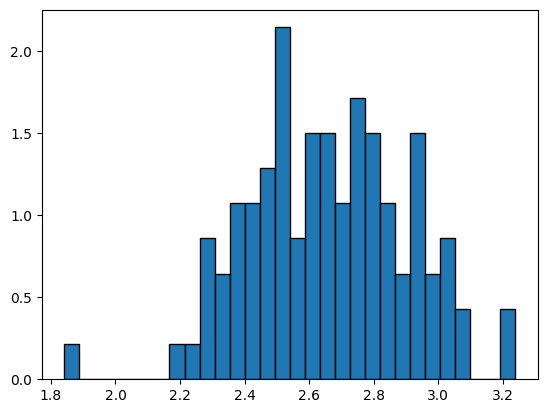

I don't think this histogram resembles the pdf of the distribution


In [15]:
# data points for the pdf 
x_axis = np.linspace(-3, 5, 1000)
y_axis = list(map(custom_dist._pdf,x_axis))

fig, ax = plt.subplots() 
BINS = 30
plt.hist(sample_means_n_100, bins=BINS, edgecolor='black', density=True)
# plt.plot(x_axis, y_axis)
plt.show()

print("I don't think this histogram resembles the pdf of the distribution")

**Problem 4f**

Now repeat similar experiments to the one above. Perform N random draws from the p.d.f. 100 times, and record the mean of the sample means and the standard deviation of the sample means.

Do this for N = 10, 30, 100, 300, 1000, 3000, and 10000.

Plot the mean of the sample means as a function of N (use an appropriate log scale). 

Plot the sample variance of the sample means as a function of N (use an appropriate log scale). 

In [16]:
def get_sample_mean_and_var(n_draws, sample_size=100):
    sample_means = [np.mean(sample_inverse_CDF(sample_size)) for _ in range(n_draws)] 
    sample_std   = [np.std(sample_inverse_CDF(sample_size)) for _ in range(n_draws)]  
    
    return sample_means, sample_std

n_10_sample_100_mean, n_10_sample_100_std = get_sample_mean_and_var(n_draws=10)
n_30_sample_100_mean, n_30_sample_100_std = get_sample_mean_and_var(n_draws=30)
n_100_sample_100_mean, n_100_sample_100_std = get_sample_mean_and_var(n_draws=100)
n_300_sample_100_mean, n_300_sample_100_std = get_sample_mean_and_var(n_draws=300)
n_1000_sample_100_mean, n_1000_sample_100_std = get_sample_mean_and_var(n_draws=1000)
n_3000_sample_100_mean, n_3000_sample_100_std = get_sample_mean_and_var(n_draws=3000)
n_10000_sample_100_mean, n_10000_sample_100_std = get_sample_mean_and_var(n_draws=10000)

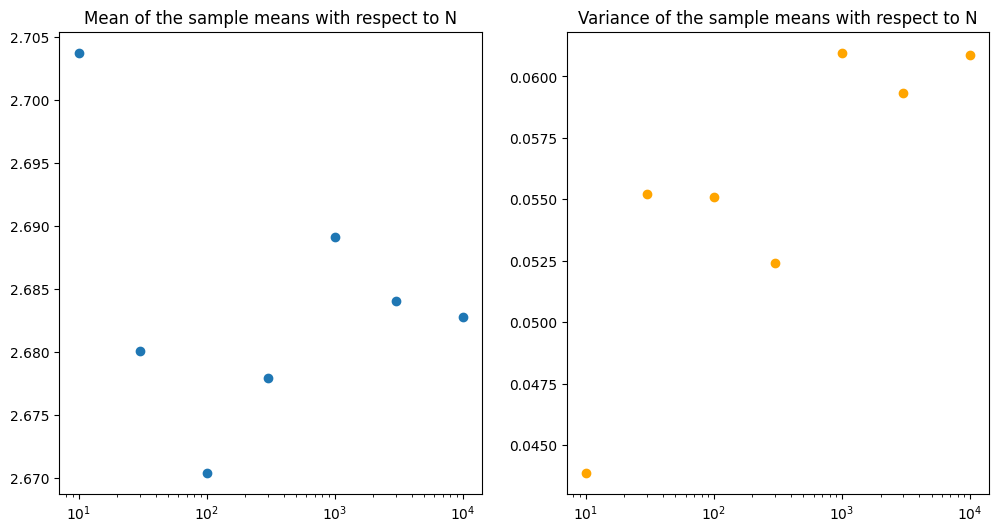

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
BINS = 30


means_wrt_N = [np.mean(sample_mean) for sample_mean in [n_10_sample_100_mean, n_30_sample_100_mean, n_100_sample_100_mean, n_300_sample_100_mean, n_1000_sample_100_mean, n_3000_sample_100_mean, n_10000_sample_100_mean]]
N = [10, 30, 100, 300, 1000, 3000, 10000]
ax[0].scatter(N, means_wrt_N)
ax[0].set_xscale('log')
ax[0].set_title('Mean of the sample means with respect to N')

vars_wrt_N = [np.var(sample_mean) for sample_mean in [n_10_sample_100_mean, n_30_sample_100_mean, n_100_sample_100_mean, n_300_sample_100_mean, n_1000_sample_100_mean, n_3000_sample_100_mean, n_10000_sample_100_mean]]
N = [10, 30, 100, 300, 1000, 3000, 10000]
ax[1].scatter(N, vars_wrt_N, color='orange')
ax[1].set_xscale('log')
ax[1].set_title('Variance of the sample means with respect to N')

plt.show()

## Problem 5) 10 points

Micro-bernedoodles (a type of dog) weigh less than mini-bernedoodles. Suppose a test statistic $t$ based on mass measurements has been constructed and it follows a Gaussian distribution centered about 12 for micro-bernedoodles and about 14 for mini-bernedoodles, with a variance of 1 for each hypothesis. A test statistic is constructed to select micro-bernedoodles by requiring $t_\mathrm{cut} < 13$. 

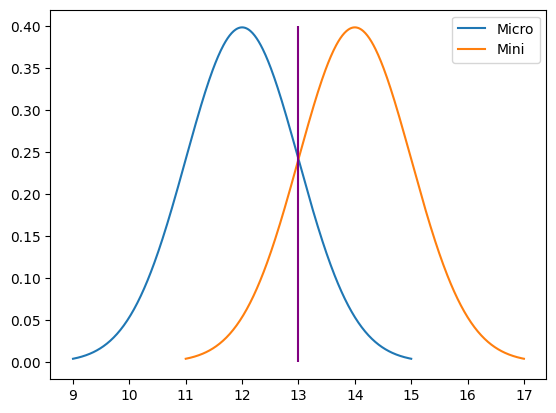

In [18]:
x_micro, y_micro = gaussian_dist(12, 1)
x_mini,  y_mini  = gaussian_dist(14, 1)

fig, ax = plt.subplots() 

plt.plot(x_micro, y_micro, label='Micro')
plt.plot(x_mini, y_mini, label='Mini')
plt.vlines(x=13, ymin=0, ymax=0.4, colors='purple')
plt.legend() 
plt.show() 

**Problem 5a**

What is the significance level of the test (i.e., the probability to reject a micro-bernedoodle given the decision boundary $t_\mathrm{cut}$)? 

<!--- calculate answer here or use a look up table (but cite your reference for the latter) ---> 

\begin{align}
\alpha  &= \int_{t_{cut}}^{\infty} \frac{1}{\sqrt{2 \pi}}e^{-\frac{1}{2}({x-12})^2} \\ 
        &= \int_{13}^{\infty} \frac{1}{\sqrt{2 \pi}}e^{-\frac{1}{2}({x-12})^2} \\ 
        \approx 0.159
\end{align}

Reference: https://www.calculator.net/z-score-calculator.html?c1raw=13&c1mean=12&c1sd=1&calctype=zscore&x=85&y=11

**Problem 5b**


What is the *power* of the test against the hypothesis that the dog is a mini-bernedoodle?

The power of the test describes how well the chosen decision boundary can discriminate against the alternative hypothesis $H_1$. It is defined as $1-\beta$ where $\beta = \int_{-\infty}^{t_\mathrm{cut}} g(t|H_1)dt$. 

<!--- calculate answer here or use a look up table (but cite your reference for the latter) ---> 

\begin{align}
\beta   &= \int_{-\infty}^{t_{cut}} \frac{1}{\sqrt{2 \pi}}e^{-\frac{1}{2}({x-14})^2} \\ 
        &= \int_{-\infty}^{13} \frac{1}{\sqrt{2 \pi}}e^{-\frac{1}{2}({x-14})^2} \\ 
        \approx 0.159
\end{align}

\begin{align}
1 - \beta       &= 1 - 0.159 \approx  0.841
\end{align}

Reference: https://www.calculator.net/z-score-calculator.html?c1raw=13&c1mean=14&c1sd=1&calctype=zscore&x=73&y=22

**Problem 5c**

Suppose that (the world's most glorious) farm is known to have a sample of bernedoodles, with 99% minis and 1% micros. What is the purity of the micro sample selected by $t < 13$?

\begin{align}
p_{micro}   &= \frac{\text{number of micros with } t < 13}{\text{number of all dogs with } t < 13 } \\ 
            &= \frac{ \int_{-\infty}^{t_{cut}} a_{micro} g(t|\text{micro}) dt }{ \int_{-\infty}^{t_{cut}} a_{micro} g(t|\text{micro}) dt + \int_{-\infty}^{t_{cut}} a_{mini} g(t|\text{mini}) dt } \\
            &= \frac{0.01 \cdot (1- \alpha)}{0.01 \cdot (1- \alpha) + 0.99 \cdot \beta} \\
            &= \frac{0.01 \cdot 0.841}{0.01 \cdot 0.841 + 0.99 \cdot 0.159} \approx 0.051 
\end{align}


**Problem 5d**

Suppose you require a sample of micro-bernedoodles with a purity of at least 95%. What should the
critical region (i.e. the cut value) of the test be? What is the efficiency for accepting electrons
with this cut value? 

*write your answer here*

In [19]:
t_cuts = [13-(i*0.01) for i in range(400)]

for t_cut in t_cuts:
    a_micro = stats.norm.cdf(t_cut-12)
    a_mini  = stats.norm.cdf(t_cut-14) 
    purity = 0.01*a_micro/(0.01*a_micro + 0.99*a_mini)

    if purity > 0.95:
        print(t_cut)
        break 

9.48


$t_{cut}$ should be $9.484$. Assuming the problem is asking about accepting micros instead of electrons, $\epsilon_{micro} = \int_{-\infty}^{9.48} \frac{1}{\sqrt{2 \pi}}e^{-\frac{1}{2}({x-12})^2} \approx 0.00586$